# MSE 446 Project
## car-price-prediction-ml
## Group Members: Kiyon Farokhi and Eunchan Koh

### Revised Problem Statement
Accurately determining a fair price for a car can be challenging for both individuals and dealerships. Consumers who lack in-depth pricing knowledge risk overpaying or falling victim to scams, while dealerships may inadvertently overvalue or undervalue their inventory. To address this issue, we propose developing a machine learning model that forecasts the fair market price of a car using comprehensive data from a wholesale car dealer website. This model will consider a wide range of factors—including brand, model, production year, mileage, accident history, and additional features—to generate reliable price estimates. Ultimately, the model’s predictions aim to help both consumers and dealerships make more informed decisions about buying or selling vehicles.

Machine learning offers a more robust and flexible approach to car price prediction because it can capture the complex interactions and non-linear relationships among a broad set of variables. Unlike traditional pricing models, which typically rely on a small number of features or strict linear assumptions, machine learning models adapt to market changes over time by integrating new data into their training process. This adaptability is especially important in a market subject to evolving consumer preferences, economic conditions, and seasonal trends. Furthermore, machine learning methods can incorporate a richer variety of inputs—including structured data like vehicle mileage and brand, as well as unstructured data such as text descriptions or vehicle history reports—leading to more accurate and insightful price forecasts. By continuously learning from new information and uncovering hidden patterns that conventional models might overlook, a machine learning–based pricing system can provide more reliable and up-to-date valuation guidance.
**Hypothesis:** Incorporating time-based features (e.g., incremental mileage, adjusted depreciation for future years) into a tree-based ensemble model (e.g., Random Forest) will reduce the Root Mean Squared Error (RMSE) of 1–3 year car resale price predictions by at least 20% compared to a baseline linear regression model.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


### Implementing Multiple Linear Regression with new_cars/data.csv 

In [2]:
# get new car dataset
df_new_cars = pd.read_csv('./data/new_cars/data.csv')

# inspecting the data
display(df_new_cars.head(10))
display(df_new_cars.info())
display(df_new_cars.describe())


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

None

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [3]:
# checking unique values for market Category
display(df_new_cars['Market Category'].unique())
# identifying missing data
missing_count = df_new_cars.isnull().sum()
print("Missing Values per Column:\n", missing_count)
print(len(df_new_cars))

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', nan, 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
   

Missing Values per Column:
 Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64
11914


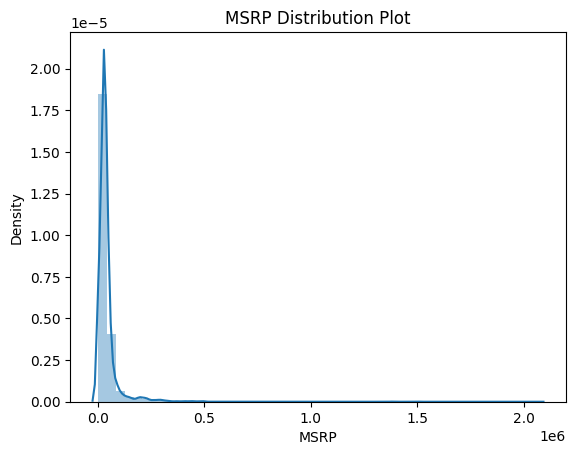

In [4]:
# Data Distribution
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1200)
plt.title('MSRP Distribution Plot')
sns.distplot(df_new_cars['MSRP'])
plt.show()

## Distribution Plot analysis
While testing different limits on x, it seems like the dataset has outlier cars. 

In [5]:
# creating price groups in 10 000 increments
df_new_cars['price_group'] = pd.cut(df_new_cars['MSRP'],
                                    bins=range(0,600000 + 10000, 10000),
                                    right=False)
# count number of vehicles per price group
price_group_counts = df_new_cars['price_group'].value_counts().sort_index()
print(df_new_cars['price_group'].isnull())



0        False
1        False
2        False
3        False
4        False
         ...  
11909    False
11910    False
11911    False
11912    False
11913    False
Name: price_group, Length: 11914, dtype: bool


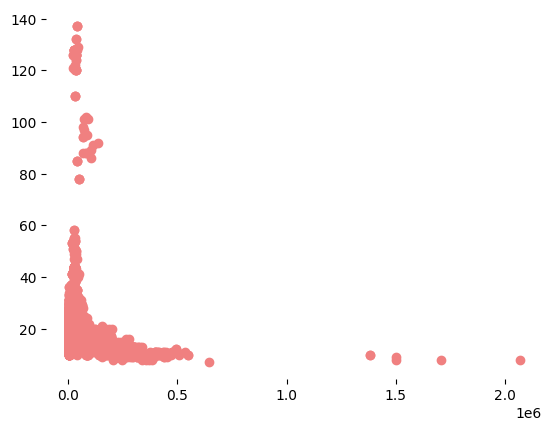

In [6]:
# Relationship between City mpg and MSRP
plt.scatter(df_new_cars['MSRP'], df_new_cars['city mpg'], color='lightcoral')
plt.box(False)
plt.show()